Задача №13.
Для набора данных проведите нормализацию для одного (произвольного)
 числового признака с использованием функции "обратная зависимость - 1 / X".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [3]:
# Будем использовать только обучающую выборку
data = pd.read_csv('data/final_cars_datasets.csv', sep=",")

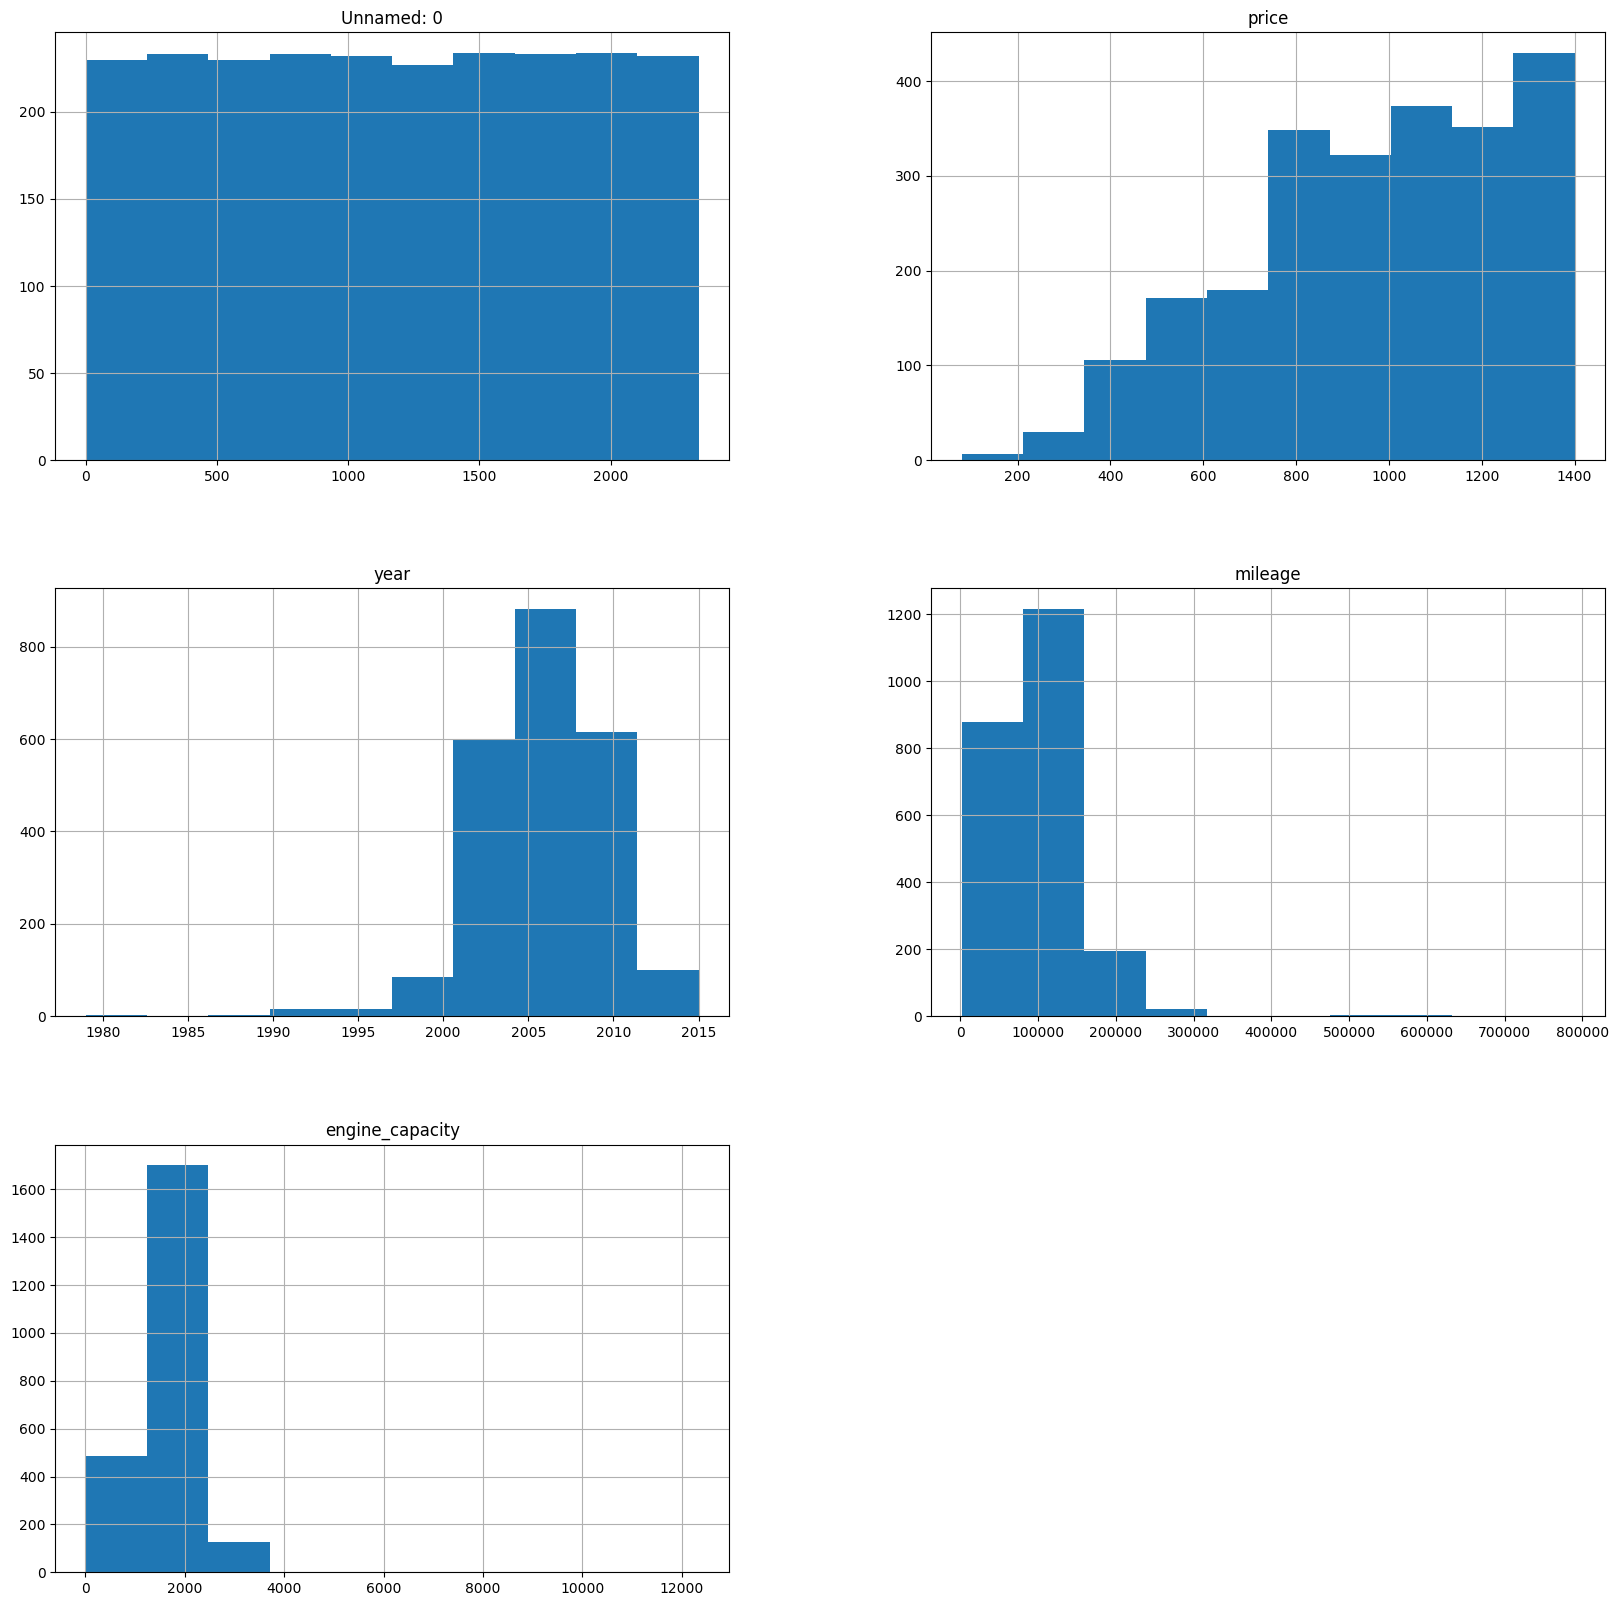

In [4]:
data.hist(figsize=(20,20))
plt.show()

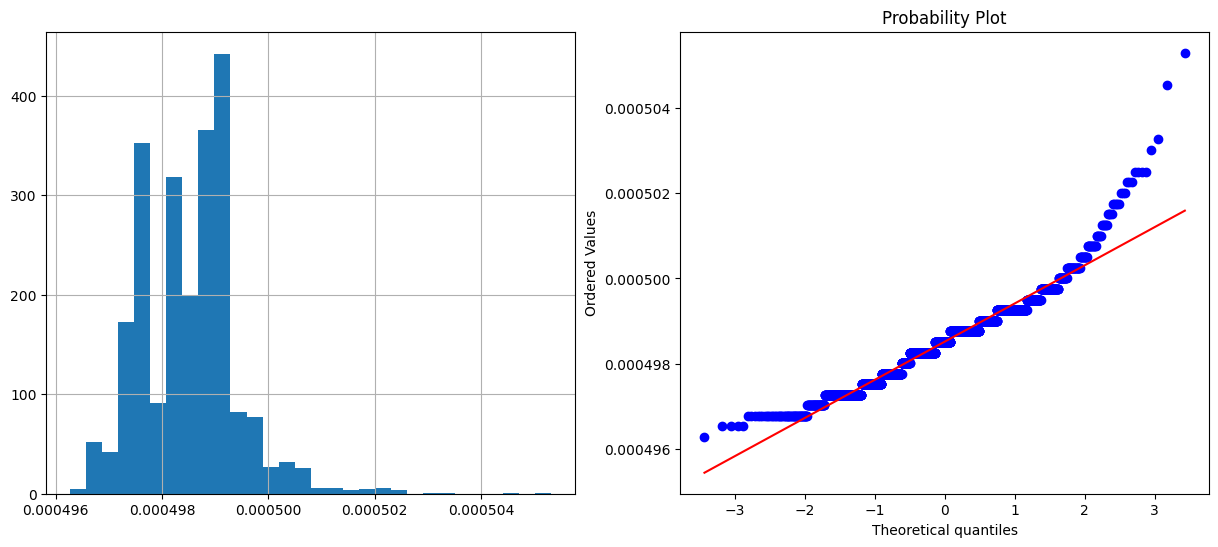

In [6]:
data['price'] = 1 / (data['year']) 
diagnostic_plots(data, 'price')

Задача №33.
Для набора данных проведите процедуру отбора признаков (feature selection).
 Используйте метод обертывания (wrapper method), алгоритм полного перебора
 (exhaustive feature selection).

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline 
sns.set(style="ticks")

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [1]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

<class 'NameError'>: name 'load_iris' is not defined